# Ejercicio de programación Regresión Lineal

In [163]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [164]:
data = pd.read_csv('/content/Fish.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [165]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
#Procesamiento de frases
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [166]:
# Leer datos separados por una coma
X = data.iloc[:, 6] # alto
y = data.iloc[:, 5] # ancho
# X = X.to_numpy()
y = y.to_numpy()

m = y.size  # m = numero de ejemplos de entrenamiento

In [167]:
print(m)

159


In [168]:
print(y)

[11.52   12.48   12.3778 12.73   12.444  13.6024 14.1795 12.67   14.0049
 14.2266 14.2628 14.3714 13.7592 13.9129 14.9544 15.438  14.8604 14.938
 15.633  14.4738 15.1285 15.9936 15.5227 15.4686 16.2405 16.36   16.3618
 16.517  16.8896 18.957  18.0369 18.084  18.7542 18.6354 17.6235  4.1472
  5.2983  5.5756  5.6166  6.216   6.4752  6.1677  6.1146  5.8045  6.6339
  7.0334  6.55    6.4     7.5344  6.9153  7.3968  7.0866  8.8768  8.568
  9.485   8.3804  8.1454  8.778  10.744  11.7612 12.354   6.8475  6.5772
  7.4052  8.3922  8.8928  8.5376  9.396   9.7364 10.3458 11.088  11.368
  2.112   3.528   3.824   4.5924  4.588   5.2224  5.1992  5.6358  5.1376
  5.082   5.6925  5.9175  5.6925  6.384   6.11    5.64    6.11    5.875
  5.5225  5.856   6.792   5.9532  5.2185  6.275   7.293   6.375   6.7334
  6.4395  6.561   7.168   8.323   7.1672  7.0516  7.2828  7.8204  7.5852
  7.6156 10.03   10.2565 11.4884 10.881  10.6091 10.835  10.5717 11.1366
 11.1366 12.4313 11.9286 11.73   12.3808 11.135  12.800

In [169]:
print(X.size)

159


# New Section

# New Section

### 1.1 Trazar los datos

In [170]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Alto')
    pyplot.xlabel('Ancho')


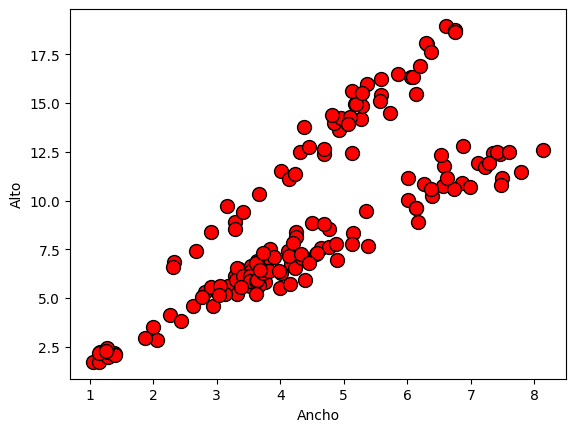

In [171]:
plotData(X, y)

In [172]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [173]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [174]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [175]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 49.37
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 4.04
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [176]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [177]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 150000
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 0.0657, 2.0159
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

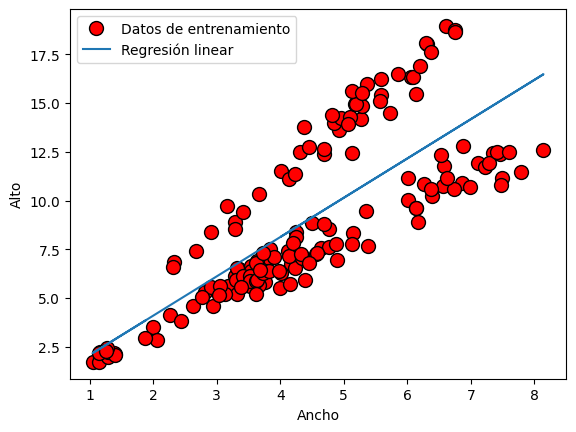

In [178]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [179]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 4.2], theta)
print('Para un ancho de = 4.2, se predice un alto de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 6.1], theta)
print('Para un ancho de = 6.1, se predice un alto de {:.2f}\n'.format(predict2))

Para un ancho de = 4.2, se predice un alto de 8.53

Para un ancho de = 6.1, se predice un alto de 12.36



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

# New Section

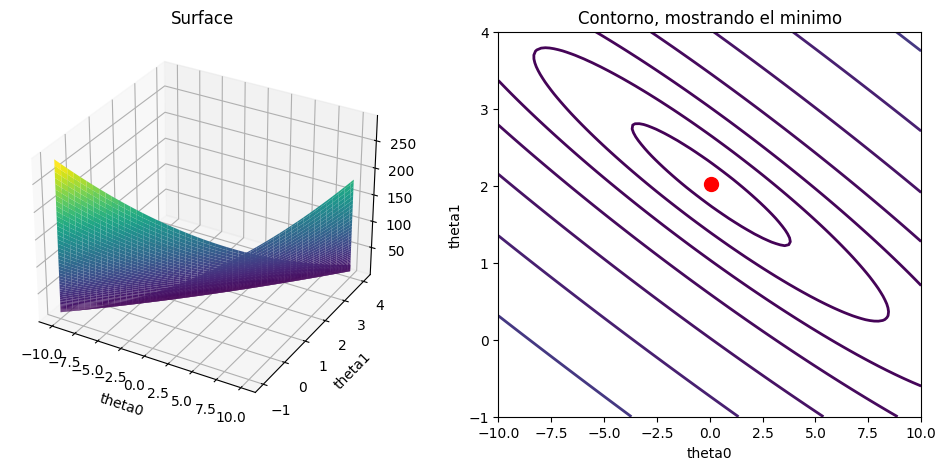

In [180]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass